## Introduction

When it comes to data cleaning it is not always that we have to deal with **NaN or Zero values** so that we can remove them and data cleaning is done! In real time practical projects things aren't that simple we have to do further analysis, and for the same **Outliers detection** is one of those method on which we have to put our focus for every iteration of analysis.

In this article, we will do the **Outliers pruning** on three types of data i.e. **One** dimensional, **two** dimensional and **Curve** data using some statistical method like **z-score**, data distribution and **polynomial fit distribution**. By the end of this article one will able to detect the outliers in all sort of data (as mentioned), and this is not all, along with working with scratch at the end we will also use **python's famous sklearn package** to **automate** everything within few line of code. In this way one will have the mathematical knowledge behind the concept as well as the simple and steady practical implementation. 

(1010,) (1010, 2)


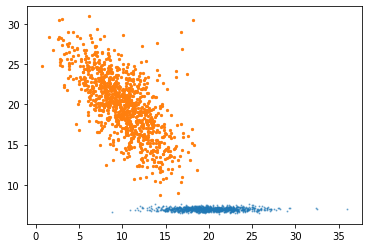

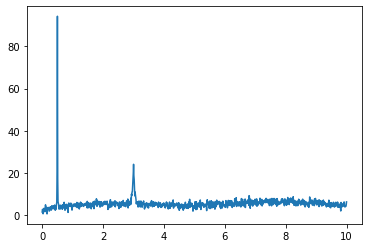

In [1]:
import numpy as np
import matplotlib.pyplot as plt

d1 = np.loadtxt("outlier_1d.txt")
d2 = np.loadtxt("outlier_2d.txt")
d3 = np.loadtxt("outlier_curve.txt")
print(d1.shape, d2.shape)

plt.scatter(d1, np.random.normal(7, 0.2, size=d1.size), s=1, alpha=0.5)
plt.scatter(d2[:, 0], d2[:, 1], s=5)
plt.show();
plt.plot(d3[:, 0], d3[:, 1]);

**Inference:** In this whole article by the time we are not automating stuffs, only **numpy and matplotlib** library will be used. Anyways, we have the **text based dataset** for all three types for that **np.loadtxt()** method is preffered. Then looking at the shape for 1-D and 2-D dataset we can see both have **1010 rows** (**10 are outliers** that I have deliberatly added for analysing the outliers).

We later plot the data points using **scatter plot** and in the output there are two plots one is indicating the **1-D(blue)** and **2-D(red)** dataset and second one is **curve fit**. Though from the naked eye as well some outliers are visible from the graph still that is not the right way for outlier detection.

## Steps for outliers pruning

The most basic and most-common way of manually doing outlier pruning on data distributions is to:

1. Using statistical measure to fit the model as polynomial equation
2. Find all points below a certain z-score
3. Remove those outliers
4. Refit the distributions, and potentially run again from Step 1 (till all the outliers are not removed).

Rejection 5 points
z-score of 3 corresponds to a prob of 0.27%


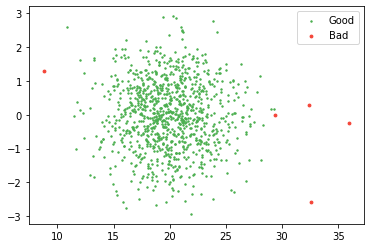

In [2]:
mean, std = np.mean(d1), np.std(d1)
z_score = np.abs((d1 - mean) / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
from scipy.stats import norm
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=d1.size)
plt.scatter(d1[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(d1[~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend();

**Inference:** One of the best and most used method for detecting the outliers is **z-score**. **What is z-score?**, Z-score is also known as **standard score** which checks whether the data points are lying withing the range (between highest percentile and lower percentile). **If the threshold value goes par z-score then that particular data point is an outlier.**

In the above line of code as well we are following the same approach where firstly calculating the z-score with formula- ((**X-mean)/ standard deviation**) where X is each data point, and if we want to traverse through each instance for that loop is mandatory. The plot says it all! according to the threshold value we can see the **red dots** are the **outiers** or the **bad data** while the **green** one is **good** data. 

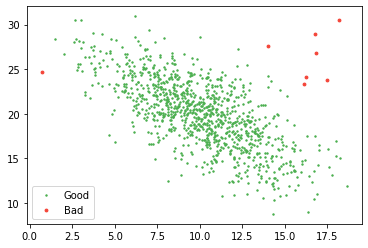

In [3]:
from scipy.stats import multivariate_normal as mn

mean, cov = np.mean(d2, axis=0), np.cov(d2.T)
good = mn(mean, cov).pdf(d2) > 0.01 / 100 # where "cov" is the covariance and "pdf" is pobability density function

plt.scatter(d2[good, 0], d2[good, 1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good, 1], s=8, label="Bad", color="#F44336")
plt.legend();

So, how do we pick what our threshold should be? Visual inspection is actually hard to beat. You can make an argument for relating the number to the number of samples you have or how much of the data you are willing to cut, but be warned that too much rejection is going to eat away at your actual data sample and bias your results.

## Outliers in curve fitting

If you don't have a distribution but instead have data with uncertainties, you can do similar things. To take a real world example, in [one of the paper](https://arxiv.org/abs/1603.09438), we have some value of **xs, ys and error** (**wavelength**, **flux** and **flux error**) and want to subtract the smooth background. We wanted to do this with a simple **polynomial fit**, but unfortunately the data had several emission lines and cosmic ray impacts in it (visible as spikes) which biased our poly fitting and so we had to remove them.

What we did is fit a polynomial to it, remove all points more than three standard deviations from polynomial from consideration and loop until all points are within three standard deviations. In the example below, for simplicity the data is normalised so that all errors are one.

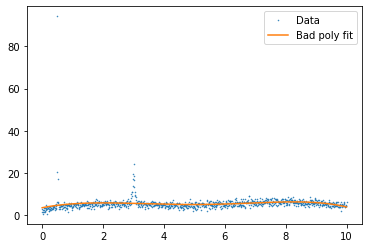

In [4]:
xs, ys = d3.T
p = np.polyfit(xs, ys,deg=5)
ps = np.polyval(p, xs)
plt.plot(xs, ys, ".", label="Data", ms=1)
plt.plot(xs, ps, label="Bad poly fit")
plt.legend();

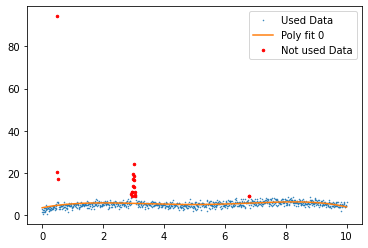

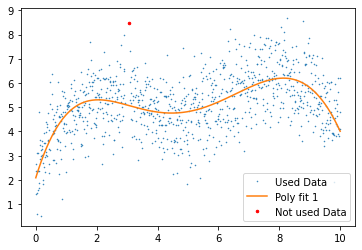

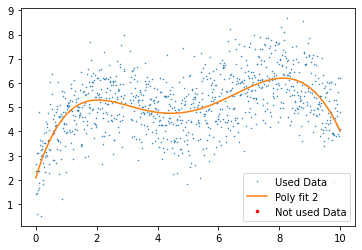

In [5]:
x, y = xs.copy(), ys.copy()
for i in range(5):
    p = np.polyfit(x, y, deg=5)
    ps = np.polyval(p, x)
    good = y - ps < 3  # Here we will only remove positive outliers
    
    x_bad, y_bad = x[~good], y[~good]
    x, y = x[good], y[good]
    
    plt.plot(x, y, ".", label="Used Data", ms=1)
    plt.plot(x, np.polyval(p, x), label=f"Poly fit {i}")
    plt.plot(x_bad, y_bad, ".", label="Not used Data", ms=5, c="r")
    plt.legend()
    plt.show()
    
    if (~good).sum() == 0:
        break

**Inference:** Before discussing the plots let's first see that what **staistical measures** we have used via Python, So firstly we fit the data points with **5th degree of polynomial** within the rang of 5 iterations (though at the end of the loop we do have the breakpoint which will break the loop of the outliers are removed before 5th iteration).

* **1st plot:** In this plot we have a **good, bad data and ploynomial fit**, where we can see that due to the presence of outlier the fit line is not clearly giving is better insights.

* **2nd plot:** In this plot we applied the **5th degree polynomial fit** which tends to detect the outliers and remove few of them with few left as **residual**.

* **3rd plot:** Here in the another iteration we can see that **all the outlier are removed** with no red dots in the graph.

# Automating it

Blessed `sklearn` to the rescue. Check out [the main page](https://scikit-learn.org/stable/modules/outlier_detection.html) which lists a ton of ways you can do outlier detection. I think **LOF (Local Outlier Finder)** is great - it uses the distance from one point to its closest twenty neighbours to figure out point density and removes those in low density regions.

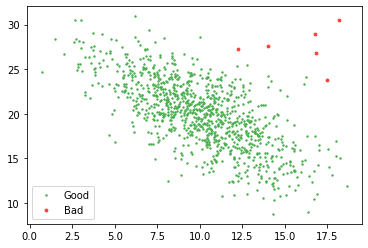

In [6]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.005)
good = lof.fit_predict(d2) == 1
plt.scatter(d2[good, 0], d2[good, 1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good, 1], s=8, label="Bad", color="#F44336")
plt.legend();

**Inference:** As mentioned for Automating the above process we are using the **LOF** from sklearn's **neighbors** module where we just have call the LOF instance by passing in the **number of neighbors** and **contamination rate** then at the last using the **fit_predict** method on top of whole dataset (setting the threshold as well simultaneously) and boom! we got the exact same plot with red dots as bad data and other one as good data.

## Conclusion

By far we are able to detect the outliers using both **statistical methods** (from scratch) as well as with **sklearn library**. It's been a good learning as we have covered most of the things related to outlier detection and removal now in this section we will try to discuss everything in a nuthsell to give a brief about outlier pruning.

1. Firstly we **loaded** all the data which was needed for the analysis using **Numpy**. Then we looked for the steps that are required for the outlier pruning/detection.

2. Then we went for the practical implementation where we not only detected the outliers but also removed them in both **N-Dimensional** data as well as for the uncertain **curve data** using various **statistics measures**.

3. At the last we covered the **Automating section** where we learned how a simply python's sklearn library can execute the above long process in a matter of few lines of codes.